# Data Analysis

### Importing the required libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Lets Read the dataset

In [27]:
data = pd.read_csv('/Users/manis/Downloads/dataset/pokemon.csv')
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [28]:
print('There are {} rows and {} columns in the above dataset..'.format(data.shape[0], data.shape[1]))

There are 800 rows and 13 columns in the above dataset..


### Lets find out which features have missing value

In [29]:
data.isnull().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

#### We found that there is only one feature named 'Type 2' that contains Nan values of about 48%

### Lets find out the numerical features in the dataset

In [30]:
data.drop('#', axis=1, inplace=True)

In [31]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype!='O']
print('There are {} numerical features in the dataset..'.format(len(numerical_feature)))
numerical_feature

There are 9 numerical features in the dataset..


['Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [32]:
data[numerical_feature].head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False


### Lets find out if there is any discrete feature in numerical features

In [33]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<21]
print('There are {} discrete features in the dataset..'.format(len(discrete_feature)))
for feature in discrete_feature:
    print(feature, ' has {} unique values..'.format(len(data[feature].unique())))
    print('They are: ', data[feature].unique())

There are 2 discrete features in the dataset..
Generation  has 6 unique values..
They are:  [1 2 3 4 5 6]
Legendary  has 2 unique values..
They are:  [False  True]


### Here we got two discrete features but out of them 'Legendary' is our dependent variable, so lets plot and see how it is depending on 'Generation

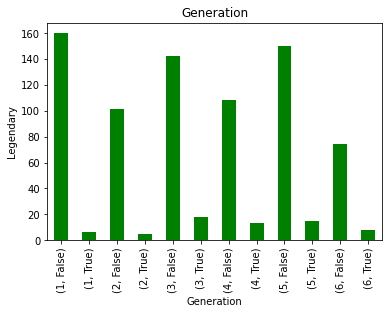

In [34]:
for feature in discrete_feature:
    if feature == 'Legendary':
        pass
    else:
        df = data.copy()
        df.groupby(feature)['Legendary'].value_counts().plot.bar(color='green')
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Legendary')
        plt.show()

### We can see Target cariable 'Legendary' have very less data of class label True in comparision to False class label

In [35]:
data['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

Text(0, 0.5, 'Frequency count')

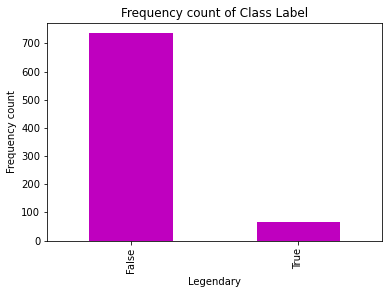

In [36]:
count = pd.value_counts(data['Legendary'])
count.plot(kind='bar', color='m')
plt.title('Frequency count of Class Label')
plt.xlabel('Legendary')
plt.ylabel('Frequency count')

### There is class imbalance problem as we have 735 data of False class and only 65 data with True class

### Lets find out the continuous features in dataset

In [37]:
continuous_feature = [feature for feature in numerical_feature if len(data[feature].unique())>20]
print('There are {} continuous features in the dataset'.format(len(continuous_feature)))
continuous_feature

There are 7 continuous features in the dataset


['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [38]:
data[continuous_feature].head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


### working on Outliers

sd Range of  Total :  195.3264  to  674.8786
There are 34 sd outliers in  Total
[195, 195, 680, 780, 780, 180, 700, 680, 680, 195, 190, 700, 700, 700, 700, 770, 770, 680, 780, 194, 700, 680, 680, 680, 680, 720, 680, 680, 700, 700, 680, 680, 700, 680]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


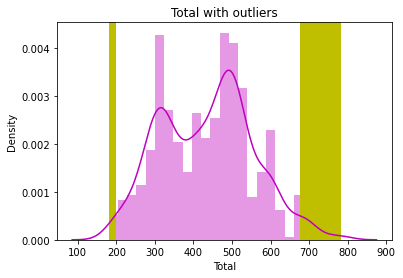

sd Range of  HP :  18.2213  to  120.2962
There are 26 sd outliers in  HP
[140, 10, 250, 130, 130, 160, 125, 190, 255, 150, 1, 144, 130, 170, 150, 135, 150, 150, 165, 125, 125, 125, 123, 123, 126, 126]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


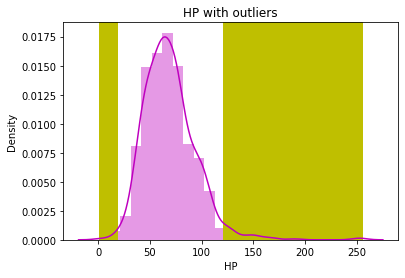

sd Range of  Attack :  14.1271  to  143.8754
There are 39 sd outliers in  Attack
[150, 5, 155, 10, 155, 190, 150, 150, 10, 185, 10, 164, 160, 150, 160, 165, 150, 145, 145, 150, 150, 180, 150, 180, 150, 180, 165, 5, 170, 145, 165, 160, 147, 150, 145, 170, 150, 160, 160]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


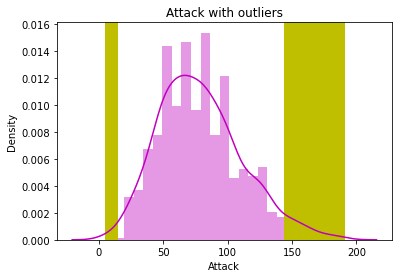

sd Range of  Defense :  11.5145  to  136.1705
There are 31 sd outliers in  Defense
[180, 180, 160, 5, 140, 200, 230, 140, 230, 140, 10, 150, 140, 180, 230, 140, 150, 200, 150, 140, 160, 160, 168, 5, 145, 145, 150, 150, 150, 184, 150]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


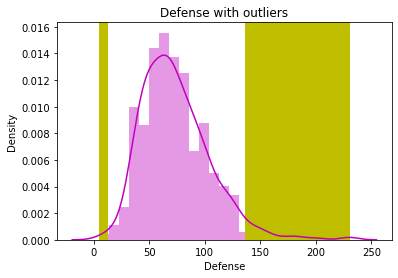

sd Range of  Sp. Atk :  7.4163  to  138.2237
There are 32 sd outliers in  Sp. Atk
[159, 175, 170, 154, 154, 194, 165, 140, 145, 165, 145, 140, 160, 150, 180, 150, 150, 180, 150, 180, 140, 150, 150, 140, 145, 145, 150, 170, 150, 160, 150, 170]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


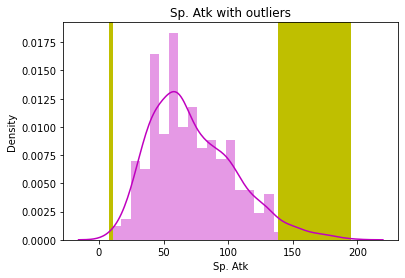

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


sd Range of  Sp. Def :  16.2795  to  127.5255
There are 32 sd outliers in  Sp. Def
[130, 130, 230, 140, 135, 154, 154, 135, 130, 200, 150, 130, 150, 140, 160, 160, 138, 150, 135, 130, 130, 135, 129, 128, 154, 150, 130, 150, 150, 150, 130, 130]


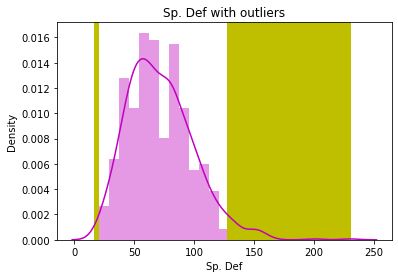

sd Range of  Speed :  10.1929  to  126.3621
There are 26 sd outliers in  Speed
[145, 150, 130, 140, 130, 130, 150, 130, 130, 140, 130, 5, 145, 160, 135, 10, 150, 150, 180, 135, 10, 5, 127, 10, 145, 128]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


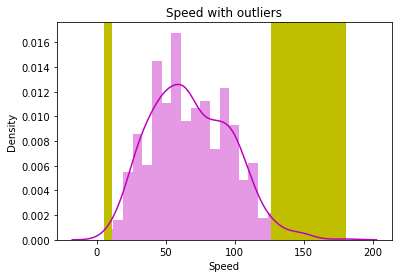

In [53]:
for feature in continuous_feature:
    l = np.mean(data[feature])-2*np.std(data[feature])
    h = np.mean(data[feature])+2*np.std(data[feature])
    print('sd Range of ', feature, ': ', np.round(l,4), ' to ', np.round(h,4))
    outliers = []
    values = []
    for val in data[feature].values:
        if val>h or val<l:
            outliers.append(1)
            values.append(val)
        else:
            outliers.append(0)
    df = data.copy()
    df[feature+'_sd_outliers'] = outliers
    print('There are {} sd outliers in '.format(len(values)), feature)
    print(values)
    sns.distplot(data[feature], bins=25, color='m')
    #plt.axvline(x=minimum, ymin=0, ymax=1, fillstyle='left', color='m')
    #plt.axvline(x=maximum, ymin=0, ymax=1, fillstyle='right', color='m')
    plt.axvspan(h, data[feature].max(), color='y')
    plt.axvspan(data[feature].min(), l, color='y')
    plt.title(feature+' with outliers')
    plt.xlabel(feature)
    plt.show()

range iqr  Total : 52.5 to  792.5
There are 0 outliers in  Total
[]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


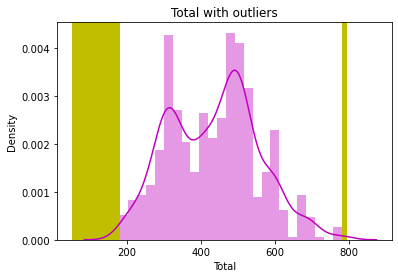

range iqr  HP : 5.0 to  125.0
There are 19 outliers in  HP
[140, 250, 130, 130, 160, 190, 255, 150, 1, 144, 130, 170, 150, 135, 150, 150, 165, 126, 126]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


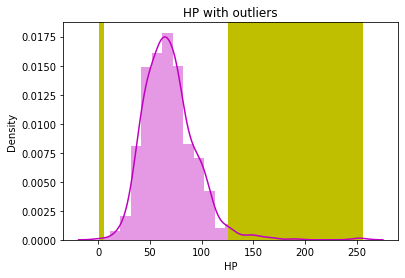

range iqr  Attack : -12.5 to  167.5
There are 7 outliers in  Attack
[190, 185, 180, 180, 180, 170, 170]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


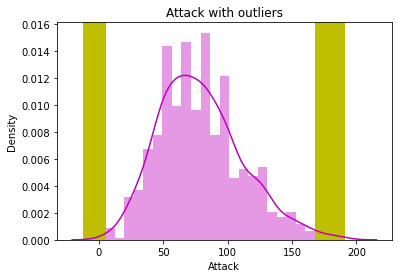

range iqr  Defense : -10.0 to  150.0
There are 13 outliers in  Defense
[180, 180, 160, 200, 230, 230, 180, 230, 200, 160, 160, 168, 184]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


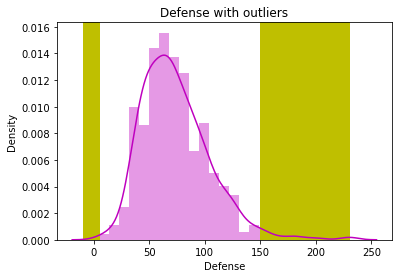

range iqr  Sp. Atk : -18.125 to  162.875
There are 10 outliers in  Sp. Atk
[175, 170, 194, 165, 165, 180, 180, 180, 170, 170]


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


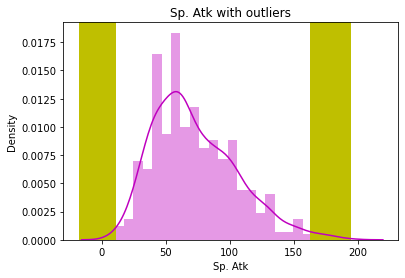

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


range iqr  Sp. Def : -10.0 to  150.0
There are 7 outliers in  Sp. Def
[230, 154, 154, 200, 160, 160, 154]


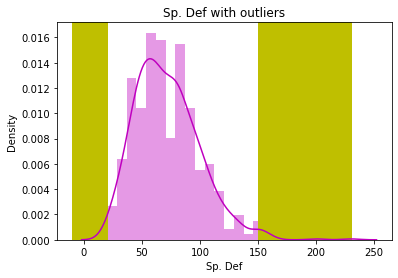

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


range iqr  Speed : -22.5 to  157.5
There are 2 outliers in  Speed
[160, 180]


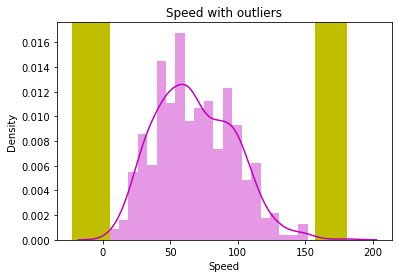

In [54]:

for feature in continuous_feature:
    q3 = data[feature].quantile(0.75)
    q1 = data[feature].quantile(0.25)
    iqr = q3 - q1
    maximum = q3 + 1.5*iqr
    minimum = q1 - 1.5*iqr
    print('range iqr ',feature, ':', minimum,'to ',maximum)
    outliers = []
    values = []
    for val in data[feature].values:
        if val>maximum or val<minimum:
            outliers.append(1)
            values.append(val)
        else:
            outliers.append(0)
    df = data.copy()
    df[feature+'_outliers'] = outliers
    print('There are {} outliers in '.format(len(values)), feature)
    print(values)
    sns.distplot(data[feature], bins=25, color='m')
    #plt.axvline(x=minimum, ymin=0, ymax=1, fillstyle='left', color='m')
    #plt.axvline(x=maximum, ymin=0, ymax=1, fillstyle='right', color='m')
    plt.axvspan(maximum, data[feature].max(), color='y')
    plt.axvspan(data[feature].min(), minimum, color='y')
    plt.title(feature+' with outliers')
    plt.xlabel(feature)
    plt.show()
    

 ### Lets see the distribution of continuous variables

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


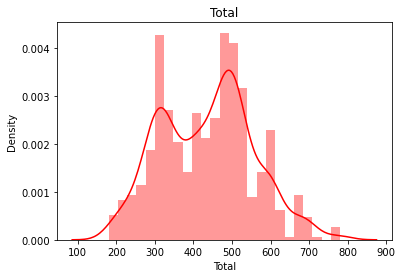

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


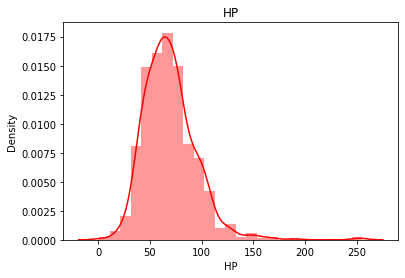

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


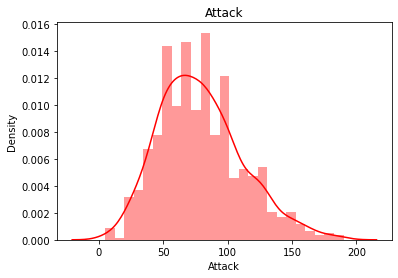

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


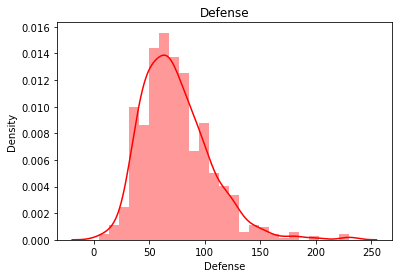

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


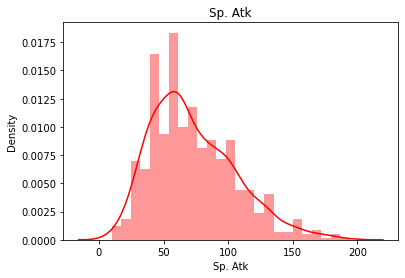

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


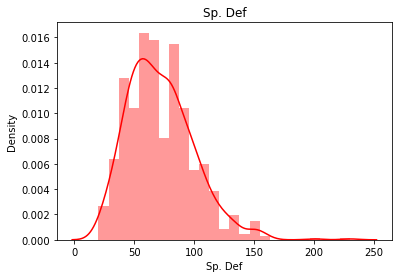

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


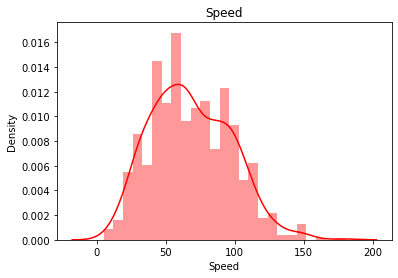

In [55]:
for feature in continuous_feature:
    df = data.copy()
    sns.distplot(data[feature], bins=25, color='red')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

### Lets find out the categorical features in the dataset

In [56]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']
print('There are {} categorical features in the dataset..'.format(len(categorical_feature)))
for feature in categorical_feature:
    print(feature, ' contains ', len(data[feature].unique()), 'values')

There are 3 categorical features in the dataset..
Name  contains  800 values
Type 1  contains  18 values
Type 2  contains  19 values


### We can drop the Name feature as it contains 800 unique values which equals to number of rows. So the dependent variable will not depend on Name feature

### Lets see overall distribution

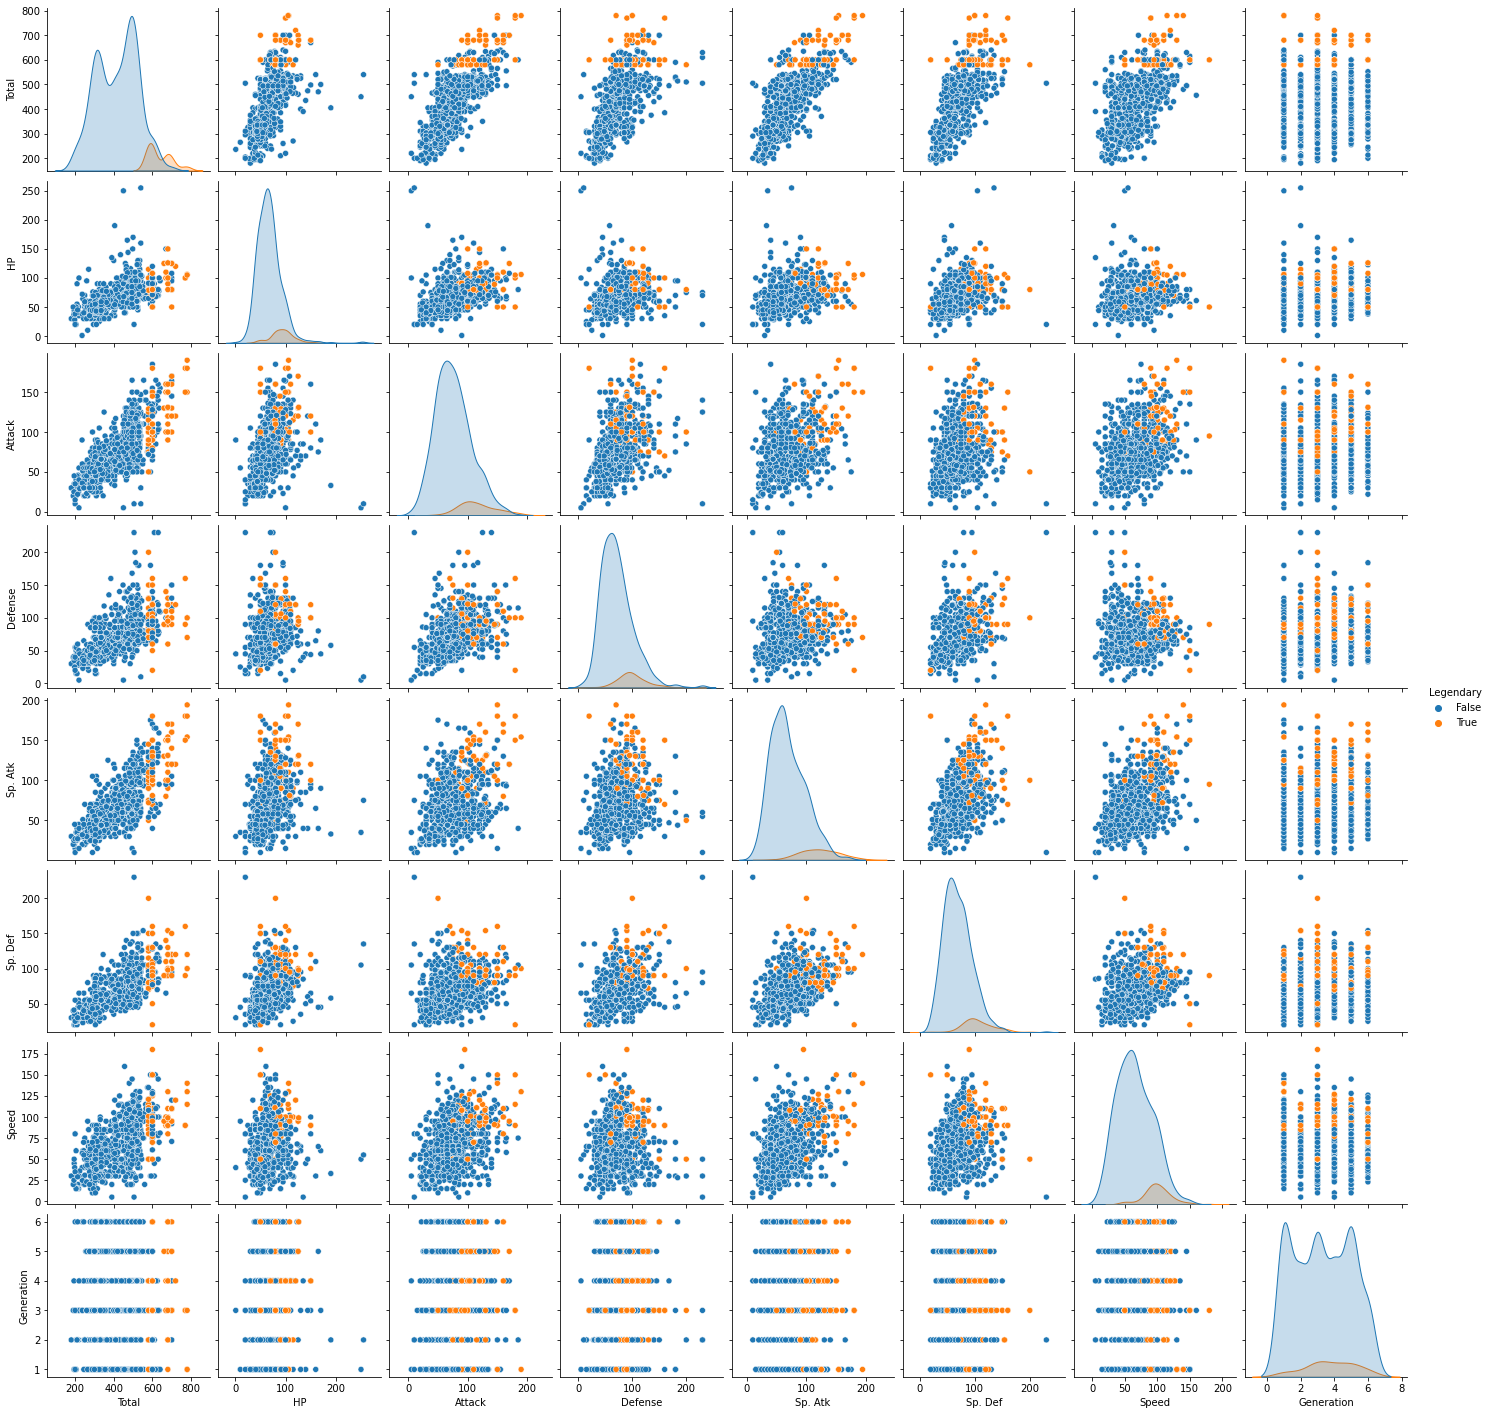

In [57]:
sns.pairplot(data, hue='Legendary')

### Lets see the correlation between each pair of feature

In [58]:
data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


#### We can see 'Generation' and '#' are highly correlated

<AxesSubplot:>

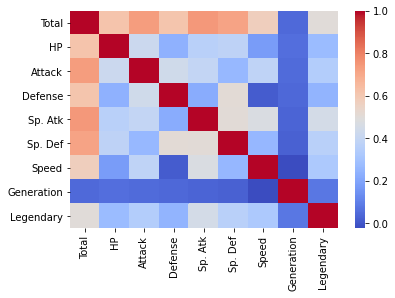

In [59]:
sns.heatmap(data.corr(), cmap='coolwarm')